In [69]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [39]:
df = pd.read_csv('data/drawndata1.csv')
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [40]:
X = df[['x','y']].values
y = df['z'] == 'a'

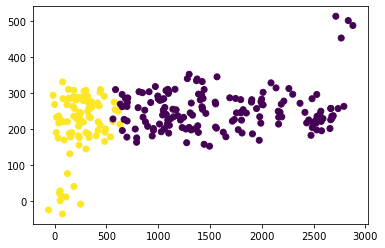

In [47]:
plt.scatter(X[:,0], X[:,1], c=y)

In [60]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [63]:
X_new = QuantileTransformer(n_quantiles=100).fit_transform(X)

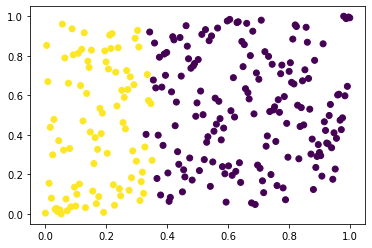

In [62]:
plt.scatter(X_new[:,0], X_new[:,1], c=y)

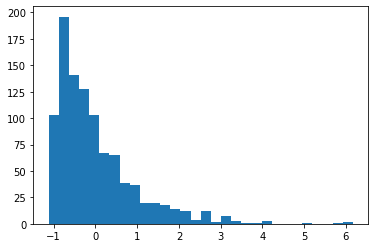

In [58]:
x = np.random.exponential(10,(1000)) + np.random.normal(0,1,(1000));
plt.hist( (x - np.mean(x))/np.std(x),30);

In [70]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

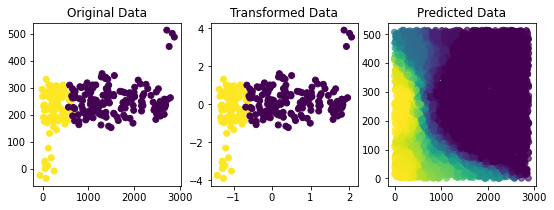

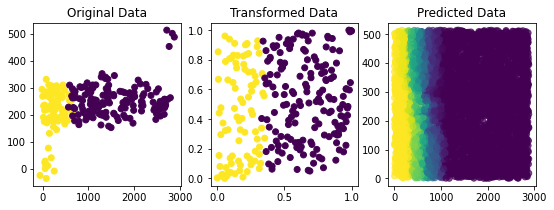

In [71]:
plot_output(scaler=StandardScaler())
plot_output(scaler=QuantileTransformer(n_quantiles=100))